In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
#import pywt
import matplotlib.patches as patches

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [6]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
for i in sorted(glob.glob(path)):
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #sorted(my_list)
  agregado_adhoc_2023=pd.concat(my_list,join="inner", ignore_index=True)
  agregado_adhoc_2023

['/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024']
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_00.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_01.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_02.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_09.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_10.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024/domiciliario4corrientes_16_11.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micr

In [7]:
agregado_adhoc_2023


,Datos X,AIValor[Amperios],BIValor[Amperios],CIValor[Amperios],DIValor[Amperios],Unnamed: 5
0,28/03/2024 16:17:18.805348157,-0.001900,0.001858,-0.000900,-0.000900,NaN
1,28/03/2024 16:17:18.805425882,-0.001900,-0.000900,0.001857,-0.000900,NaN
2,28/03/2024 16:17:18.805504083,-0.002800,0.002787,0.000000,-0.000900,NaN
3,28/03/2024 16:17:18.805582046,-0.002800,0.000929,-0.001900,-0.001900,NaN
4,28/03/2024 16:17:18.805660247,-0.000900,0.000000,0.000000,0.001857,NaN
...,...,...,...,...,...,...
153595,28/03/2024 16:18:24.007008552,-0.002800,-0.000900,-0.000900,0.000928,NaN
153596,28/03/2024 16:18:24.007086515,-0.001900,-0.001900,-0.002800,0.000000,NaN
153597,28/03/2024 16:18:24.007164716,-0.001900,-0.003700,0.001857,0.000928,NaN
153598,28/03/2024 16:18:24.007242679,0.000000,-0.000900,0.000000,0.002785,NaN


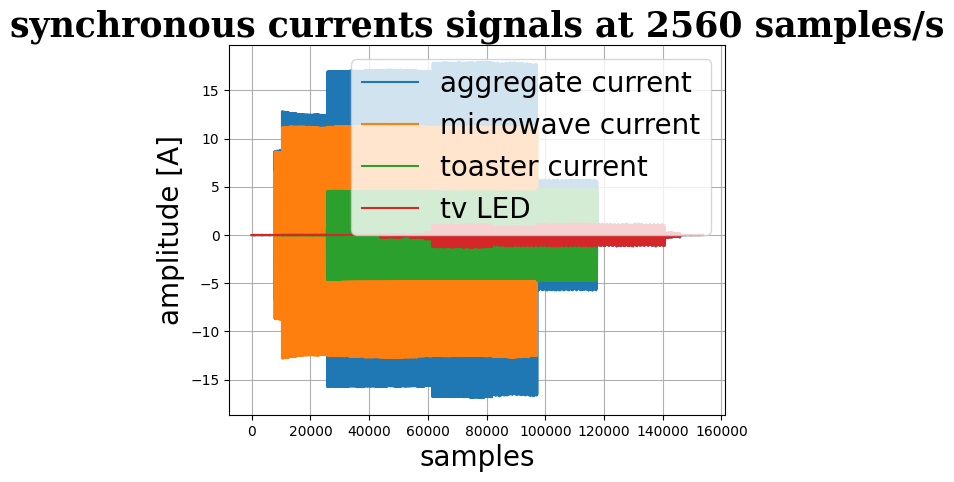

In [8]:
#plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['AVValor[Voltios]'])   ##corriente total
#plt.figure(figsize=(20,10))
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['AIValor[Amperios]'],label='aggregate current')   ##corriente total
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['BIValor[Amperios]']*(-1),label='microwave current')
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['CIValor[Amperios]'],label='toaster current')
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['DIValor[Amperios]'],label='tv LED')

leg = plt.legend(loc="upper right", fontsize=20)
plt.rc('legend', fontsize='medium')

plt.xlabel('samples', size=20)
plt.ylabel('amplitude [A]', size=20)


plt.title("synchronous currents signals at 2560 samples/s",
          fontdict={'family': 'serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 25})

plt.grid(True)

plt.savefig('corrientes_alta_frecuencia_micro_toaster_TV.png')

plt.show()

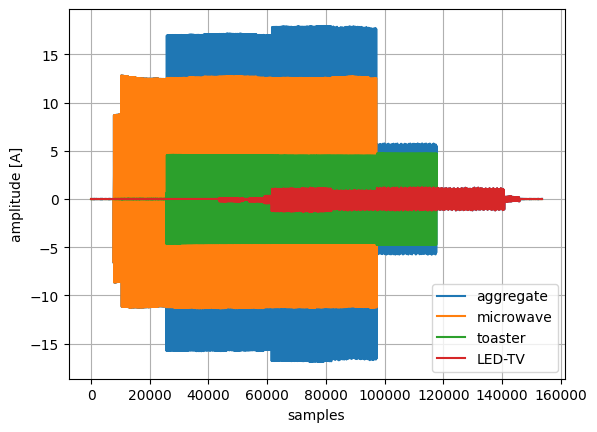

In [9]:
#plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['AVValor[Voltios]'])   ##corriente total
#plt.figure(figsize=(20,10))
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['AIValor[Amperios]'],label='aggregate')   ##corriente total
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['BIValor[Amperios]'],label='microwave')
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['CIValor[Amperios]'],label='toaster')
plt.plot(agregado_adhoc_2023.index, agregado_adhoc_2023['DIValor[Amperios]'],label='LED-TV')

#leg = plt.legend(loc="upper right", fontsize=15)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

plt.legend(loc='lower right')
plt.rc('legend', fontsize='medium')

plt.xlabel('samples')
plt.ylabel('amplitude [A]')


#plt.title("synchronous currents signals at 2560 samples/s",
       #   fontdict={'family': 'serif',
        #            'color' : 'black',
         #           'weight': 'bold',
          #          'size': 25})

plt.grid(True)

plt.savefig('ds4_mod')
#plt.savefig('ds1', bbox_inches='tight')

plt.show()

In [10]:
import os          ###Cantidad de archivos en el directorio raíz.
initial_count = 0
dir = "/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/micro_tosta_tv_2024"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

60


In [11]:
lst = list(range(0,2560*initial_count,2560))
print(lst)

[0, 2560, 5120, 7680, 10240, 12800, 15360, 17920, 20480, 23040, 25600, 28160, 30720, 33280, 35840, 38400, 40960, 43520, 46080, 48640, 51200, 53760, 56320, 58880, 61440, 64000, 66560, 69120, 71680, 74240, 76800, 79360, 81920, 84480, 87040, 89600, 92160, 94720, 97280, 99840, 102400, 104960, 107520, 110080, 112640, 115200, 117760, 120320, 122880, 125440, 128000, 130560, 133120, 135680, 138240, 140800, 143360, 145920, 148480, 151040]


In [12]:
windows_agregado_2023=[]

for i in lst:
  df_i=agregado_adhoc_2023.iloc[i:i+2560,:]
  windows_agregado_2023.append(df_i)


In [13]:

len(windows_agregado_2023)

60

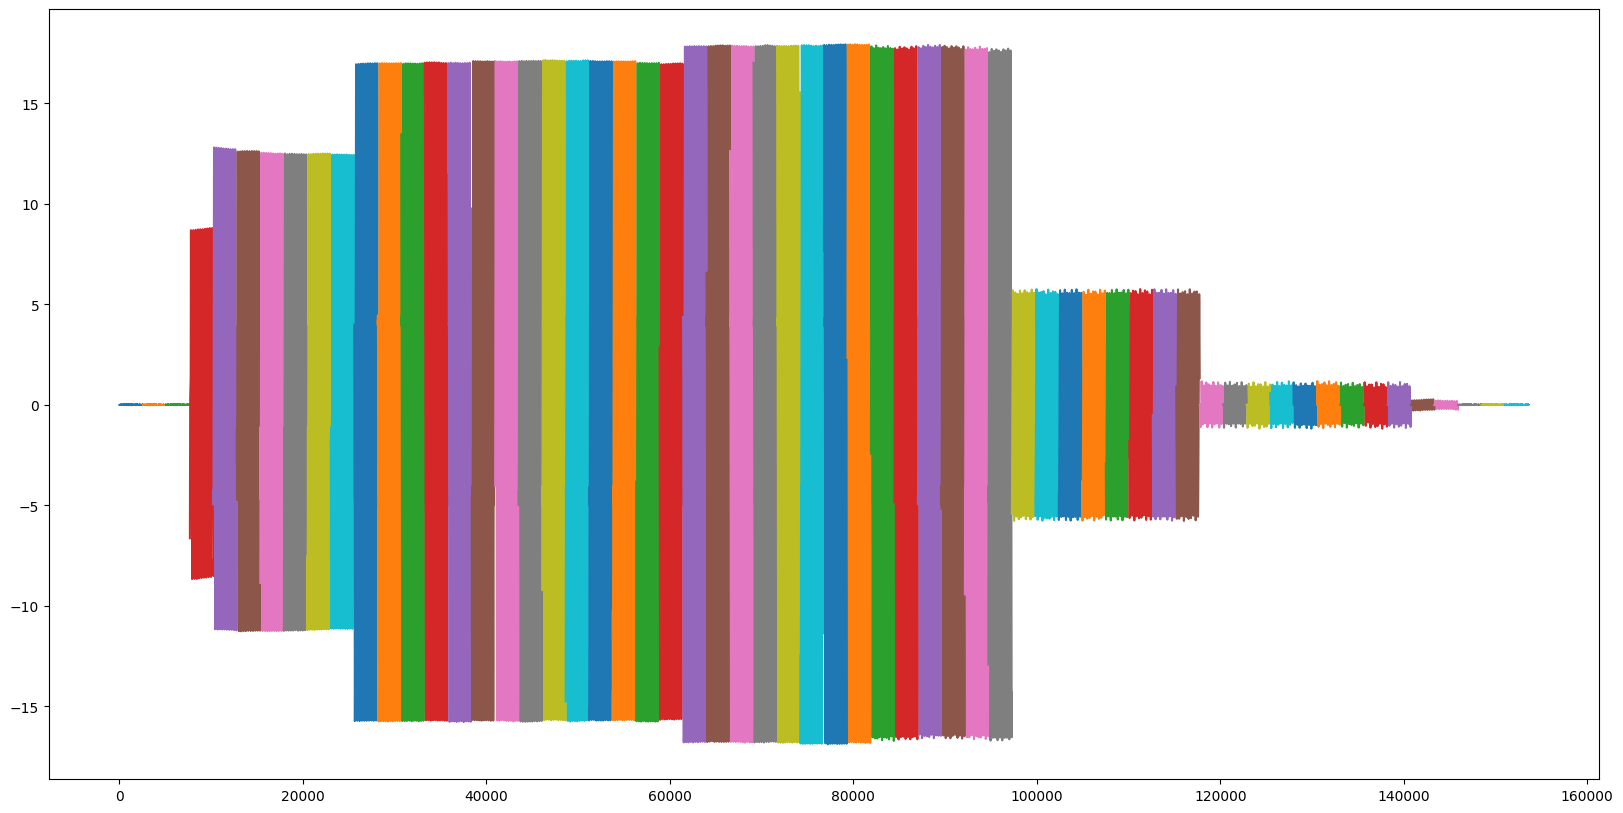

In [14]:
plt.figure(figsize=(20,10))
i=0
while i<len(windows_agregado_2023):
  pf=windows_agregado_2023[i]
  A=pf['AIValor[Amperios]']
  plt.plot(A)

  i=i+1

In [16]:
nominal_micro=windows_agregado_2023[20]['BIValor[Amperios]']
nominal_tosta=windows_agregado_2023[25]['CIValor[Amperios]']
nominal_tv=windows_agregado_2023[38]['DIValor[Amperios]']


In [17]:
np_list1 = np.array(nominal_micro)*(-1)
np_list2 = np.array(nominal_tv)*(-1)

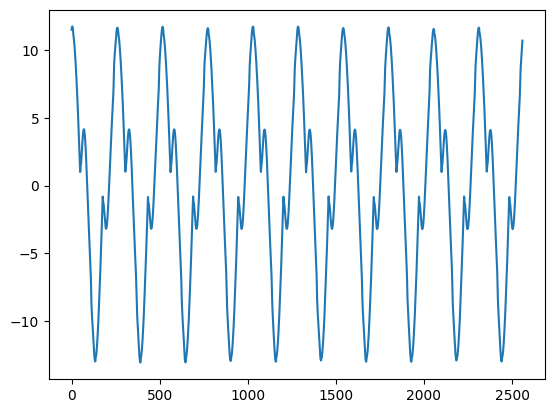

In [18]:
np_sum = np_list1 + np_list2
plt.plot(np_sum)

In [19]:
# construct a time signal
Fs= 8000 #sampling signal
tstep=1 / Fs #sample time interval
f0=50 #signal freq

N= int(10*Fs/f0)





t=np.linspace(0, (N-1)*tstep, N)
fstep= Fs/N
f=np.linspace(0, (N-1)*fstep, N)

y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)

In [20]:
#H_AA

fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_AA=[]

i=0
while i<len(windows_agregado_2023):





#while i<len(windows)/2:
  pf1=windows_agregado_2023[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= np_sum

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal
   #Fs=6450
  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_AA.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))




#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

In [21]:
#H_A

fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_A=[]

i=0
while i<len(windows_agregado_2023):





#while i<len(windows)/2:
  pf1=windows_agregado_2023[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['AIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal
   #Fs=6450
  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_A.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))




#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

In [22]:
#H_B
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_B=[]

i=0
while i<len(windows_agregado_2023):





#while i<len(windows)/2:
  pf1=windows_agregado_2023[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['BIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_B.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))




#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

In [23]:
#H_C
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_C=[]

i=0
while i<len(windows_agregado_2023):





#while i<len(windows)/2:
  pf1=windows_agregado_2023[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['CIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_C.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))
 # fig, [ax1, ax2]=plt.subplots(nrows=2, ncols=1)


#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


 # plt.show()

  i=i+1

In [24]:
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_D=[]

i=0
while i<len(windows_agregado_2023):





#while i<len(windows)/2:
  pf1=windows_agregado_2023[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['DIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_D.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))




  #plt.subplot(121)

  #plt.plot(y)

  #plt.subplot(122)
  #plt.plot(f_plot, X_mag_plot)


  #plt.show()

  i=i+1

In [25]:
len(H_D)

60

In [26]:
nominal_micro=H_B[20][0:60]
nominal_tosta=H_C[25][0:60]
nominal_tv=H_D[38][0:60]

suma de frames

Text(0.5, 1.0, 'sum of nominal frames')

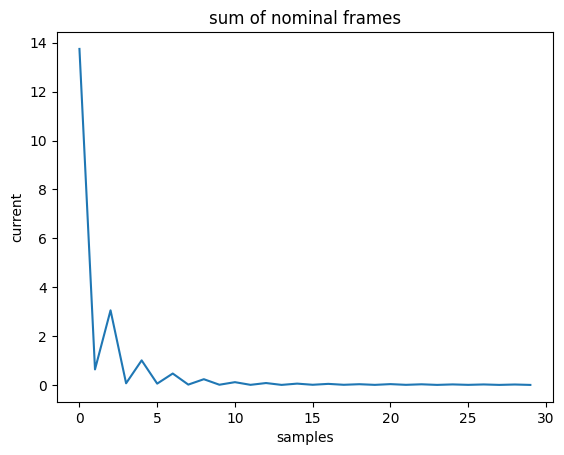

In [27]:
np_list1 = np.array(nominal_micro)
np_list2 = np.array(nominal_tosta)
np_list3= np.array(nominal_tv)

np_sum = np_list1 + np_list2
#np_sum2=np_sum+np_list3
#np_sum=list(np_sum2)

plt.plot(np_sum)
plt.xlabel('samples')
plt.ylabel('current')
plt.title('sum of nominal frames')

#plt.savefig('sumofnominalframes')

# $\beta$

tostadora

In [28]:
len(windows_agregado_2023)

60

In [29]:
#U=np.array([H_A[0][0:30], H_B[20][0:30],H_D[38][0:30], H_C[25][0:30]])

U=np.array([H_AA[0][0:30], H_B[20][0:30],H_D[23][0:30], H_C[25][0:30]])


In [30]:
len(H_A)


60

In [31]:
VC=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
len(VC)

30

In [32]:
#v1=VC
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

In [ ]:
np.dot(V[2], V[3])

-2.7548899576498864e-16

In [33]:
np.linalg.norm(V[3])

np.float64(1.1651325299321307)

In [34]:
np.dot(V[3], V[3])

np.float64(1.3575338123060472)

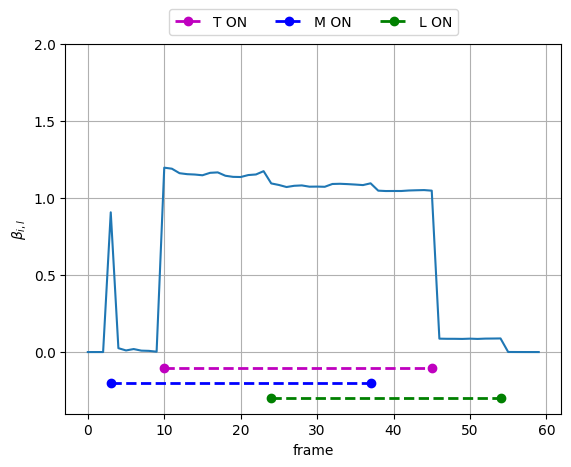

In [35]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))   #correcto
  #x=np.dot(V[3], A)/(np.dot(A, A))
  #x=np.dot(V[3], A)

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))




  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('toster detection $k \in [0:30]$; aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.ylim(0,1.7)

#plt.grid()

#plt.plot([14,70], [1.5,1.5], 'o-g', label='toaster ON')


#plt.savefig('tost detection with k=30')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.22,0.22],'--', label='inactive frame')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])
#plt.yticks([0.00, 0.50, 1.00, 1.50])



#plt.legend()


#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
   #                Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
    #               Patch(facecolor='green', edgecolor='green',
     #                    label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='best')

#plt.plot([0,59],[1.03,1.03],'--', color='orange', label='detection zone')

#plt.fill_between([0, 59], [0, 0], [1.03, 1.03], facecolor="orange", alpha=0.2)

plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])




plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.ylim(-0.4,2)
plt.savefig('indirect toster detection in dataset N°2_nueva_base11')

plt.show()


#B[3:37]
#C[10:45]
#D[17:56]

In [36]:
U=np.array([H_B[20][0:30],H_D[38][0:30], H_C[25][0:30]])

In [37]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

V=np.array([v1,v2,v3])

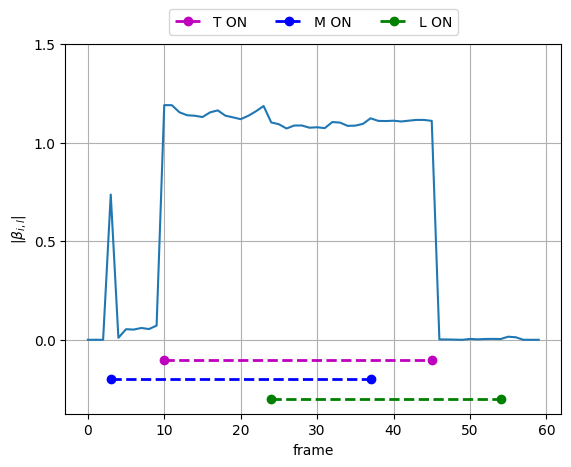

In [38]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))   #correcto
  #x=np.dot(V[3], A)/(np.dot(A, A))
  #x=np.dot(V[3], A)

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))




  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('toster detection $k \in [0:30]$; aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.xlabel('frame')
plt.ylabel(r'$|\beta_{i,l}|$')

#plt.ylim(0,1.7)

#plt.grid()

#plt.plot([14,70], [1.5,1.5], 'o-g', label='toaster ON')


#plt.savefig('tost detection with k=30')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.22,0.22],'--', label='inactive frame')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


#plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50])



#plt.legend()


#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
   #                Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
    #               Patch(facecolor='green', edgecolor='green',
     #                    label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='best')

#plt.plot([0,59],[1.03,1.03],'--', color='orange', label='detection zone')

#plt.fill_between([0, 59], [0, 0], [1.03, 1.03], facecolor="orange", alpha=0.2)

plt.savefig('indirect toster detection in dataset N°4_nw_VF_nueva_base')

plt.show()


#B[3:37]
#C[10:45]
#D[17:56]

In [39]:
U=np.array([H_B[20][0:30],H_D[38][0:30], H_C[25][0:30]])

In [40]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

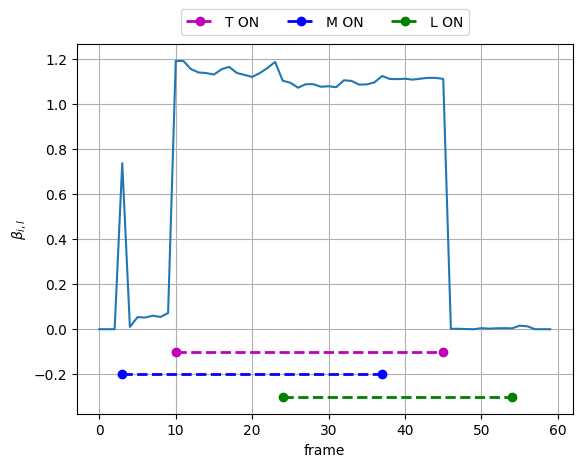

In [41]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))   #correcto
  #x=np.dot(V[3], A)/(np.dot(A, A))
  #x=np.dot(V[3], A)

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))




  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('toster detection $k \in [0:30]$; aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.ylim(0,1.7)

#plt.grid()

#plt.plot([14,70], [1.5,1.5], 'o-g', label='toaster ON')


#plt.savefig('tost detection with k=30')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.22,0.22],'--', label='inactive frame')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])
#plt.yticks([0.00, 0.50, 1.00, 1.50])



#plt.legend()


#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
   #                Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
    #               Patch(facecolor='green', edgecolor='green',
     #                    label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='best')

#plt.plot([0,59],[1.03,1.03],'--', color='orange', label='detection zone')

#plt.fill_between([0, 59], [0, 0], [1.03, 1.03], facecolor="orange", alpha=0.2)

plt.savefig('indirect toster detection in dataset N°4_nw_VF_sin_fundamental')

plt.show()


#B[3:37]
#C[10:45]
#D[17:56]

microondas

In [43]:
#U=np.array([H_A[0], H_B[30],H_D[45], H_C[20]])

U=np.array([H_D[23][0:30],H_C[25][0:30], H_B[20][0:30]])  #sin el armónico fundamental.

In [44]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

In [45]:
np.linalg.norm(V[2])

np.float64(2.3122976925899663)

In [46]:
np.dot(V[2], V[2])

np.float64(5.346720619156882)

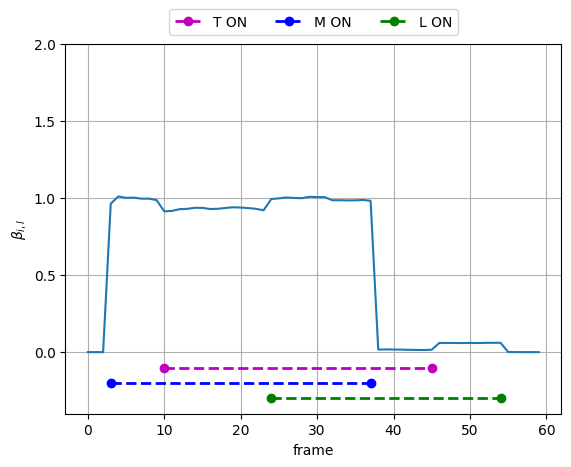

In [47]:
dot_A_referencia_11=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))

  #x=np.dot(A,A)
  dot_A_referencia_11.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_11))

#plt.title('microwave detection $k \in [0,30]$, aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])



#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')


#plt.plot([10,45],[-1,-1],'o-m', label='toaster ON')

#plt.plot([3,37],[-3,-3],'o-b', label='microwave ON')

#plt.plot([24,54],[-5,-5],'o-g', label='LED TV ON')



#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')


#plt.plot([2,52], [1.25,1.25], 'o-g', label='microwave ON')
#plt.plot([0,76],[0,0], '--', label='inactive frame')
#plt.plot([0,59],[0.93,0.93], '--', label='inactive frame')

#plt.grid()
#plt.ylim(0,2)
#plt.savefig('fridge detection with k=30')
#plt.legend()

#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
   #                Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
    #               Patch(facecolor='green', edgecolor='green',
     #                    label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='best')


#plt.fill_between([0, 59], [0, 0], [0.93, 0.93], facecolor="orange", alpha=0.2)

plt.ylim(-0.4,2)

plt.savefig('indirect microwave detection in dataset Nº2_nw_VF_nueva_base1')

plt.show()

In [50]:
#U=np.array([H_A[0][1:30], H_C[20][1:30], H_B[23][1:30], H_D[23][1:30]])   #correcto

#U=np.array([H_A[0][0:30], H_C[20][0:30], H_B[23][0:30], H_D[23][0:30]])   #correcto

#U=np.array([H_A[0][0:30], H_B[20][0:30],H_C[25][0:30], H_D[38][0:30]])  #correctisimo

#U=np.array([H_A[0][0:60], H_C[25][0:60],H_B[20][0:60], H_D[38][0:60]])  #probando intercambio
U=np.array([H_A[20][0:30], H_B[20][0:30],H_C[25][0:30], H_D[23][0:30]])

In [ ]:
#U=np.array([H_A[0][1:30], H_C[20][1:30],H_B[20][1:30], H_D[38][1:30]])
#U=np.array([H_A[0][0:30], H_B[20][0:30]], H_C[25][0:30],H_D[38][0:30])

In [51]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

In [52]:
np.linalg.norm(V[3])

np.float64(0.06077639904193645)

In [53]:
V[3]

array([-0.00021863,  0.00500284, -0.0069261 ,  0.01397275,  0.01613363,
        0.01515997, -0.00671403,  0.01605041, -0.00090286,  0.01445926,
        0.00591368,  0.01197659,  0.02799731,  0.01041449,  0.02450301,
        0.00646726,  0.017649  ,  0.0057383 ,  0.01073469,  0.00687382,
       -0.00071725,  0.00562327,  0.00479382,  0.00312046,  0.00858865,
        0.00329048,  0.00445866,  0.00346726,  0.00324083,  0.00333094])

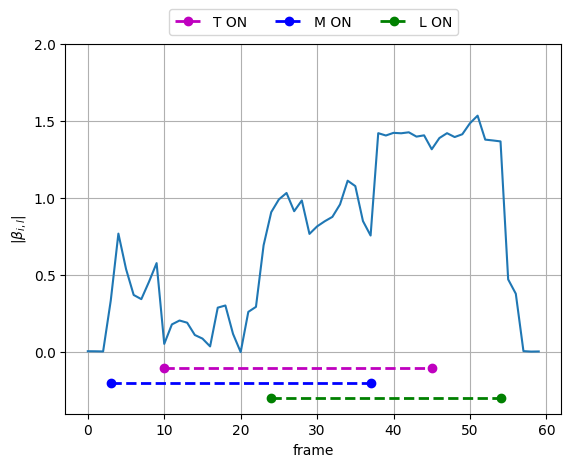

In [54]:
dot_A_referencia_111=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3])) #correcto

 # x=np.dot(V[3], A)
  #x=np.dot(V[3], A)/(np.dot(A, A))
  dot_A_referencia_111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_111))

#plt.plot(dot_A_referencia_111)

#plt.title('TV detection $k \in [0,30]$; aggregate reference frame= $A_{14}$')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$|\beta_{i,l}|$')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50, 2.00])


#plt.plot([30,75], [1,1], 'o-g', label='TV ON')
#plt.plot([0,77], [0,0], '--', label='low level reference')


#plt.plot([10,45],[-0.010,-0.010],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.012,-0.012],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.014,-0.014],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')


#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                  # Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                         # markerfacecolor='black', markersize=10),
                   #Line2D([0], [0], marker='o', color='w', label='false negative',
                          #markerfacecolor='red', markersize=10),
                 #  Patch(facecolor='orange', edgecolor='orange',
                  #       label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='upper right')


#plt.plot([30,51], [0.6,0.6], 'o-g', label='TV ON')
#plt.plot([51,75], [0.4,0.4], 'o-b', label='TV standby')
#plt.plot([0,76], [0,0], '--', label='inactive level')
#plt.plot([0,59], [0.5,0.5], '--',color='orange', label='level')

#plt.plot(19.8,0.27, marker="o", color="black",label='false positive')

#plt.plot(4,0.34, marker="o", color="black",label='false positive')

#plt.plot(4.5,0.33, marker="o", color="black",label='false positive')

#plt.plot(63,0.24, marker="o", color="red",label='false negative')

#plt.plot(64,0.24, marker="o", color="red",label='false negative')

#plt.plot([1,5], [0.24,0.24], 'o-r', label='false positive detection')

#plt.fill_between([0, 59], [0, 0], [1.45, 1.45], facecolor="orange", alpha=0.2)


#plt.grid()

#plt.legend()

#plt.ylim(0,2)
#plt.axvline(17, color = "red", linewidth = 1, linestyle = "dashed")

#plt.savefig('indirect_tv_detection_nw_sinfundamental_30arm')


plt.ylim(-0.4,2)

plt.savefig('indirect_tv_detection_nw_VF_nueva_base1')
plt.show()

In [55]:
#prueba con 3 bases de detección

U=np.array([H_B[20][0:30],H_C[25][0:30], H_D[23][0:30]])

v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

V=np.array([v1,v2,v3])








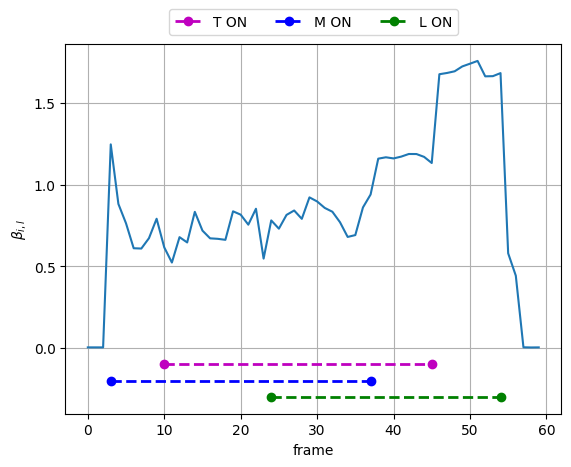

In [56]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))   #correcto
  #x=np.dot(V[3], A)/(np.dot(A, A))
  #x=np.dot(V[3], A)

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))




  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('toster detection $k \in [0:30]$; aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.ylim(0,1.7)

#plt.grid()

#plt.plot([14,70], [1.5,1.5], 'o-g', label='toaster ON')


#plt.savefig('tost detection with k=30')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.22,0.22],'--', label='inactive frame')


plt.grid()
plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')



plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])
#plt.yticks([0.00, 0.50, 1.00, 1.50])



#plt.legend()


#legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
   #                Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
    #               Patch(facecolor='green', edgecolor='green',
     #                    label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#plt.legend(handles=legend_elements, loc='best')

#plt.plot([0,59],[1.03,1.03],'--', color='orange', label='detection zone')

#plt.fill_between([0, 59], [0, 0], [1.03, 1.03], facecolor="orange", alpha=0.2)

plt.savefig('indirect toster detection in dataset N°4_nw_VF_sin_fundamental')

plt.show()


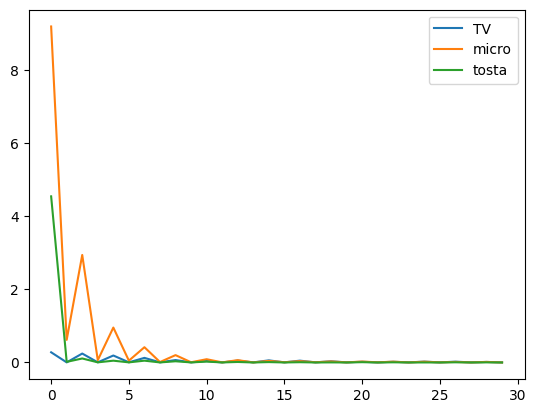

In [ ]:
plt.plot(H_D[38], label='TV')
plt.plot(H_B[20], label='micro')
plt.plot(H_C[25], label='tosta')
#plt.ylim(0,4)
plt.legend()

In [ ]:
len(H_D)

60

# $\alpha$

In [65]:
nominal_micro=H_B[10][0:10] #arranco en uno para prescindir del armónico fundamental.
nominal_tosta=H_C[30][0:10]
nominal_TV=H_D[40][0:10]

In [66]:
np_list1 = np.array(nominal_micro)# heladera nominal
np_list2 = np.array(nominal_tosta)# tostadora nominal

micro_tosta= np_list1 + np_list2
micro_tosta=list(micro_tosta)

In [67]:
np_list3=np.array(nominal_TV)
micro_tosta_tv=micro_tosta+np_list3

In [68]:
tosta_tv=np_list2+np_list3

In [69]:
micro_tv=np_list1+np_list3

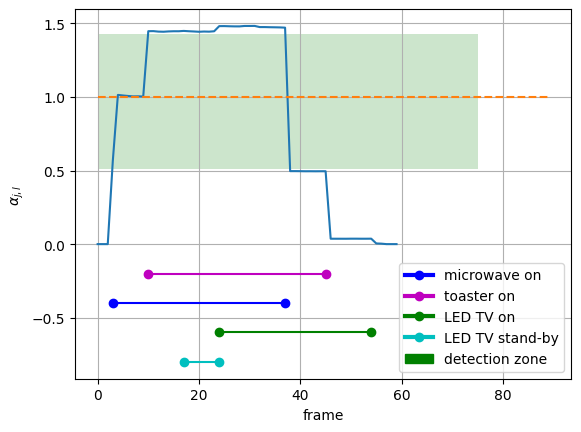

In [71]:
#micro_solo
dot_A_referencia_micro_solo_direct=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()

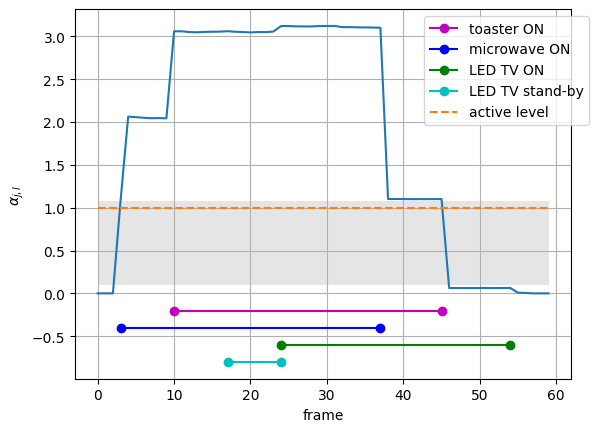

In [73]:
#tosta_sola
dot_A_referencia_tosta_sola_direct=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_tosta, A)/(np.dot(nominal_tosta, nominal_tosta))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_sola_direct.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_sola_direct))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')



plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



#plt.fill_between([0, 75], [1, 1], [1.75, 1.75], facecolor="green", alpha=0.2)

#plt.fill_between([0, 75], [1, 1], [0.50, 0.50], facecolor="green", alpha=0.2)


plt.plot([0,59],[1,1],'--',label='active level')



#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.08, 1.08], facecolor="grey", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.1, 0.1], facecolor="grey", alpha=0.2)


plt.savefig('tosta_sola_ds4_nw', bbox_inches="tight")

plt.show()

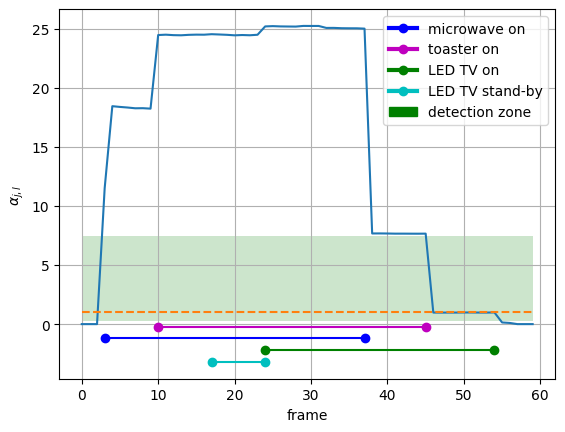

In [75]:
#tv_sola
dot_A_referencia_1_direct_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_TV, A)/(np.dot(nominal_TV, nominal_TV))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_direct_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_direct_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')




plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-1.2,-1.2],'o-b', label='microwave ON')

plt.plot([24,54],[-2.2,-2.2],'o-g', label='LED TV ON')

plt.plot([17,24],[-3.2,-3.2],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')




plt.fill_between([0, 59], [1, 1], [7.5, 7.5], facecolor="g", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.3, 0.3], facecolor="g", alpha=0.2)

plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.savefig('tv_sola_ds4_nw', bbox_inches="tight")

plt.show()

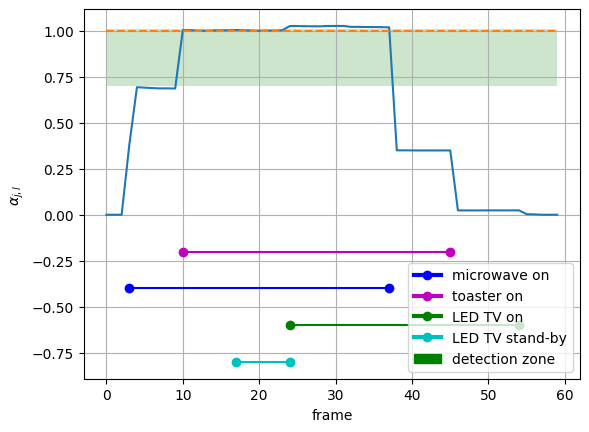

In [76]:
#tosta_micro
dot_A_referencia_tosta_micro=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[20][0:10], A)/(np.dot(H_A[20][0:10], H_A[20][0:10]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_micro.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_micro))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')



plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')




plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.7, 0.7], facecolor="green", alpha=0.2)

plt.savefig('tosta_micro_ds4_nw', bbox_inches="tight")

#plt.axvline(23, color = "red", linewidth = 1, linestyle = "dashed")

plt.show()

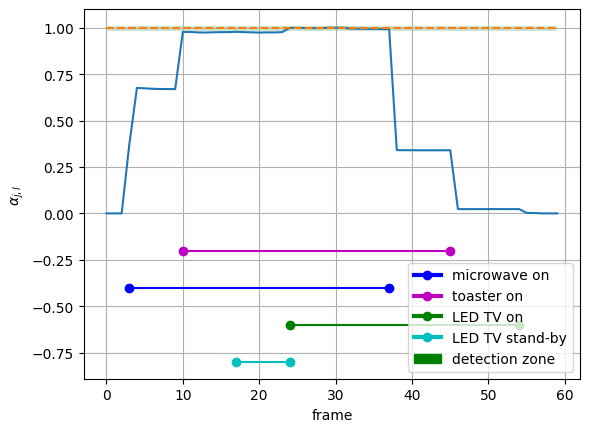

In [77]:
#tosta_micro_TV
dot_A_referencia_1_t_m_t=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[30][0:10], A)/(np.dot(H_A[30][0:10], H_A[30][0:10]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_t_m_t.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_t_m_t))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="green", alpha=0.2)


plt.savefig('tosta_micro_tv_ds4_nw', bbox_inches="tight")



plt.show()

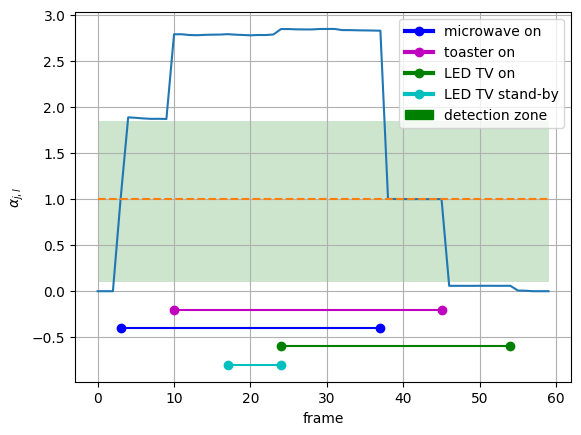

In [78]:
#tosta_tv
dot_A_referencia_tosta_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[42][0:10], A)/(np.dot(H_A[42][0:10], H_A[42][0:10]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.85, 1.85], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

plt.savefig('tosta_tv_ds4_nw', bbox_inches="tight")

plt.show()

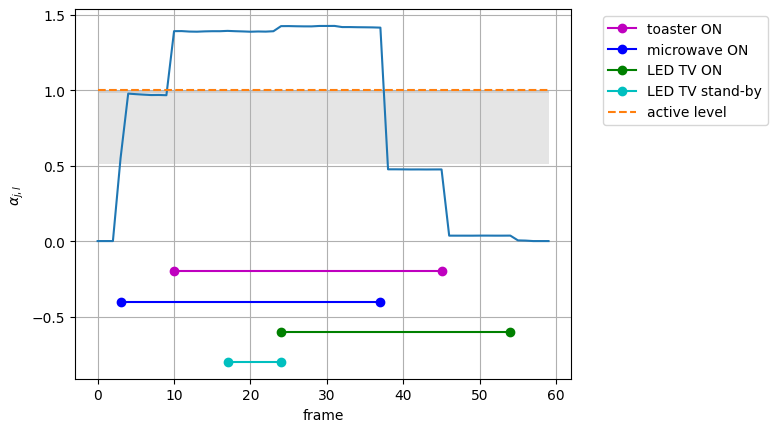

In [79]:
#micro_TV
dot_A_referencia_micro_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(micro_tv, A)/(np.dot(micro_tv, micro_tv))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')

plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="grey", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.51, 0.51], facecolor="grey", alpha=0.2)

plt.savefig('micro_tv_ds4_nw', bbox_inches="tight")

#plt.plot(RMS)


plt.show()

In [80]:
dot_A_referencia_1[5]

np.float64(0.8289375377431071)

In [81]:
micro_toaster_=H_A[20]

In [82]:
micro_toaster_tv=H_A[35]

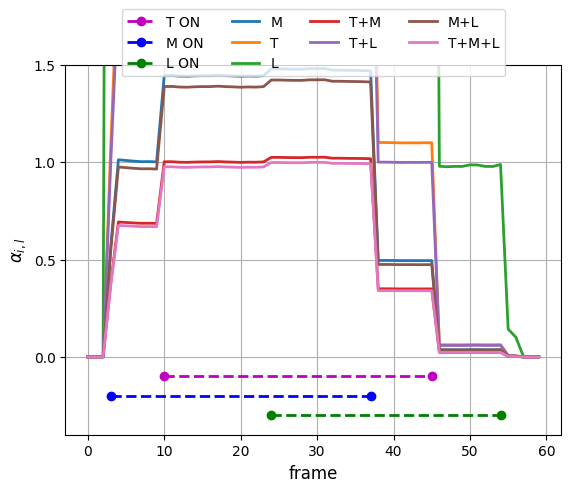

In [85]:
#plt.figure(figsize=(16,12))

plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')

plt.plot(np.abs(dot_A_referencia_micro_solo_direct), label='M', linewidth=2)#, marker='*')

plt.plot(np.abs(dot_A_referencia_tosta_sola_direct), label='T', linewidth=2)#, marker='s')

plt.plot(np.abs(dot_A_referencia_1_direct_tv), label='L', linewidth=2)#, marker='p')

plt.plot(np.abs(dot_A_referencia_tosta_micro), label='T+M', linewidth=2)#,marker='D')

#plt.plot(np.abs(dot_A_referencia_1_t_m_t), label='T+M+L', linewidth=2)#, marker='d')

plt.plot(np.abs(dot_A_referencia_tosta_tv), label='T+L', linewidth=2)#, marker='o')

plt.plot(np.abs(dot_A_referencia_micro_tv), label='M+L', linewidth=2)#, marker='x')

plt.plot(np.abs(dot_A_referencia_1_t_m_t), label='T+M+L', linewidth=2)#, marker='d')

plt.ylim(-0.4,1.5)

#plt.plot([10,45],[-0.1,-0.1],'o--m', linewidth=2, label='T ON')

#plt.plot([3,37],[-0.2,-0.2],'o--b',linewidth=2,  label='M ON')

#plt.plot([24,54],[-0.3,-0.3],'o--g', linewidth=2,  label='L ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([0,59],[1,1],'--',linewidth=3)

plt.grid()

#plt.legend(fontsize=12)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

#plt.plot(np.abs(dot_A_referencia_11))
#plt.plot(np.abs(dot_A_referencia_1))
#plt.plot(np.abs(dot_A_referencia_111))

#plt.xlabel('frame', fontsize=12)

plt.xlabel('frame', fontsize=12)
plt.ylabel(r'$\alpha_{i,l}$', fontsize=12)
#plt.ylabel(r'$\alpha_{j,l}$', fontsize=16)

#yticks = [0,1.5]
#ax.set_yticks(yticks)

plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50])

plt.savefig('comparacion_todos_DS4_v1_7_VF_1', bbox_inches="tight" )
plt.show()

In [86]:
len(dot_A_referencia_micro_solo_direct)

60

In [87]:
caso1_10arm=dot_A_referencia_micro_solo_direct
caso2_10arm=dot_A_referencia_tosta_sola_direct
caso3_10arm=dot_A_referencia_1_direct_tv
caso4_10arm=dot_A_referencia_tosta_micro
caso5_10arm=dot_A_referencia_1_t_m_t
caso6_10arm=dot_A_referencia_tosta_tv
caso7_10arm=dot_A_referencia_micro_tv

In [88]:
todos_casos_10arm=[caso1_10arm,caso2_10arm,caso3_10arm, caso4_10arm, caso5_10arm, caso6_10arm, caso7_10arm]

In [89]:
df_todos_casos_10arm_DS4=pd.DataFrame(todos_casos_10arm)
df_todos_casos_10arm_DS4

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.000154,0.000162,0.000164,0.566792,1.013537,1.009752,1.006428,1.003577,1.004139,1.002496,...,0.037054,0.037078,0.036766,0.036790,0.037116,0.004741,0.003366,0.000163,0.000160,0.000154
1,0.000339,0.000359,0.000367,1.081853,2.063650,2.057543,2.050475,2.045432,2.046396,2.044096,...,0.062966,0.063087,0.062587,0.062597,0.063157,0.007802,0.005546,0.000364,0.000354,0.000340
2,0.002483,0.002564,0.002562,11.519858,18.460535,18.399217,18.347450,18.283601,18.291103,18.253295,...,0.987339,0.986625,0.979246,0.979039,0.989116,0.143141,0.101503,0.002487,0.002572,0.002486
3,0.000108,0.000114,0.000116,0.379274,0.693465,0.691046,0.688737,0.686873,0.687237,0.686234,...,0.023799,0.023824,0.023627,0.023639,0.023849,0.003004,0.002134,0.000115,0.000113,0.000109
4,0.000106,0.000111,0.000113,0.370885,0.676192,0.673877,0.671641,0.669817,0.670164,0.669160,...,0.023316,0.023343,0.023151,0.023162,0.023368,0.002945,0.002091,0.000112,0.000110,0.000106
5,0.000308,0.000326,0.000333,0.995957,1.887980,1.882402,1.875986,1.871303,1.872180,1.870056,...,0.059170,0.059275,0.058809,0.058815,0.059345,0.007400,0.005259,0.000330,0.000322,0.000309
6,0.000148,0.000156,0.000158,0.548387,0.976498,0.972866,0.969680,0.966911,0.967447,0.965849,...,0.036303,0.036324,0.036020,0.036041,0.036364,0.004677,0.003320,0.000156,0.000154,0.000148


In [90]:
df_todos_casos_10arm_DS4.to_csv('DF_todos_casos_10arm_DS4.csv')

In [91]:
nominal_micro=H_B[10][0:1] #arranco en uno para prescindir del armónico fundamental.
nominal_tosta=H_C[30][0:1]
nominal_TV=H_D[40][0:1]



np_list1 = np.array(nominal_micro)# heladera nominal
np_list2 = np.array(nominal_tosta)# tostadora nominal

micro_tosta= np_list1 + np_list2
micro_tosta=list(micro_tosta)





np_list3=np.array(nominal_TV)
micro_tosta_tv=micro_tosta+np_list3

tosta_tv=np_list2+np_list3

micro_tv=np_list1+np_list3


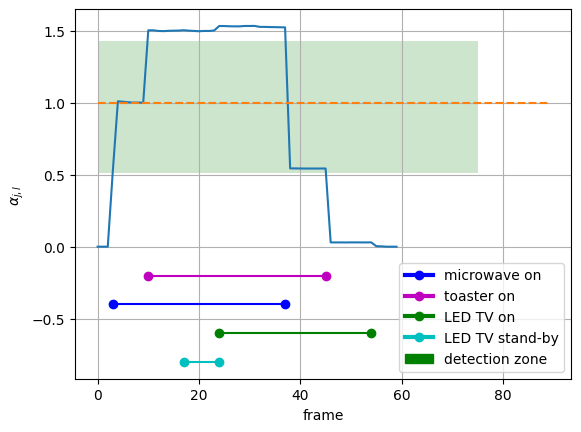

In [92]:
#micro_solo
dot_A_referencia_micro_solo_direct_1=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_1))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()


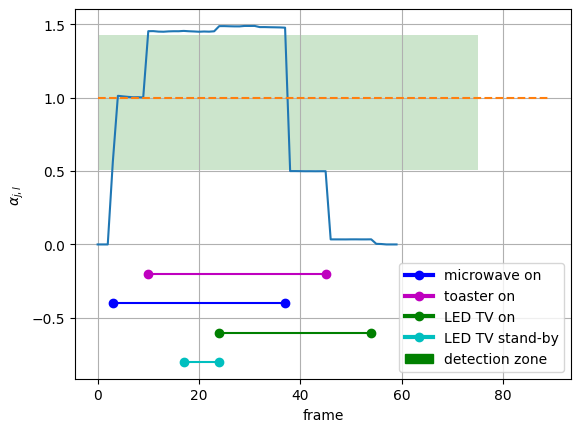

In [93]:
nominal_micro=H_B[10][0:3]

#micro_solo
dot_A_referencia_micro_solo_direct_3=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:3]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct_3.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_3))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()


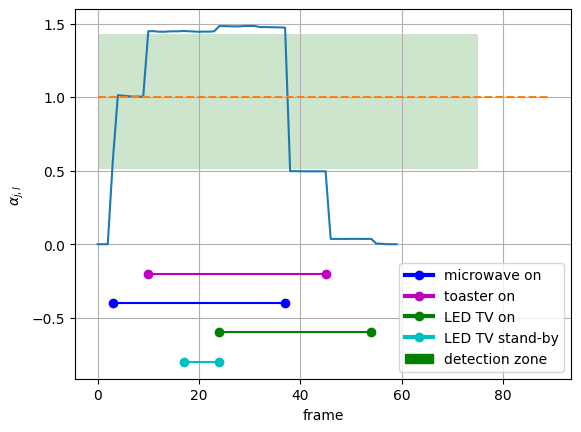

In [94]:
nominal_micro=H_B[10][0:5]

#micro_solo
dot_A_referencia_micro_solo_direct_5=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:5]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct_5.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_5))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()

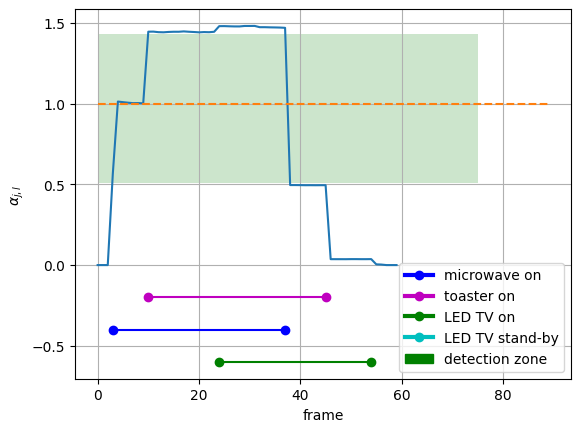

In [95]:
nominal_micro=H_B[10][0:10]

#micro_solo
dot_A_referencia_micro_solo_direct_10=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct_10.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_10))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()

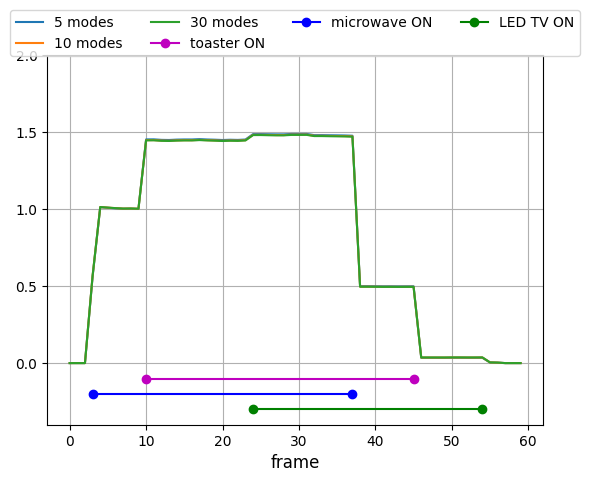

In [96]:
#plt.figure(figsize=(16,12))
#plt.plot(np.abs(dot_A_referencia_micro_solo_direct_1), label='1 mode')
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_3), label='5 modes')
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_5), label='10 modes')
plt.plot(np.abs(dot_A_referencia_micro_solo_direct_10), label='30 modes')
#plt.plot([0,59],[1,1],'--',label='active level', linewidth=3)



plt.grid()

plt.plot([10,45],[-0.1,-0.1],'o-m', label='toaster ON')

plt.plot([3,37],[-0.2,-0.2],'o-b', label='microwave ON')

plt.plot([24,54],[-0.3,-0.3],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')






plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])


plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])




plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.ylim(-0.4,2)


plt.xlabel('frame', fontsize=12)


plt.savefig('microsolo_1_3_5_10modes', bbox_inches="tight")




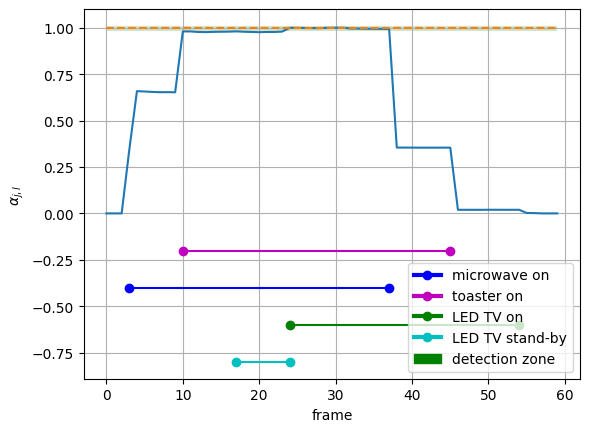

In [97]:
#tosta_micro_TV
dot_A_referencia_1_t_m_t_1mode=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[30][0:1], A)/(np.dot(H_A[30][0:1], H_A[30][0:1]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_t_m_t_1mode.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_t_m_t_1mode))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="green", alpha=0.2)


plt.savefig('tosta_micro_tv_ds4_nw', bbox_inches="tight")



plt.show()

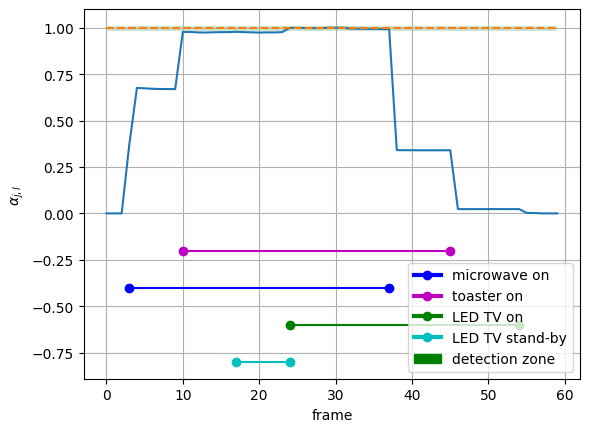

In [98]:
#tosta_micro_TV
dot_A_referencia_1_t_m_t_10mode=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[30][0:10], A)/(np.dot(H_A[30][0:10], H_A[30][0:10]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_t_m_t_10mode.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_t_m_t_10mode))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="green", alpha=0.2)


plt.savefig('tosta_micro_tv_ds4_nw', bbox_inches="tight")



plt.show()

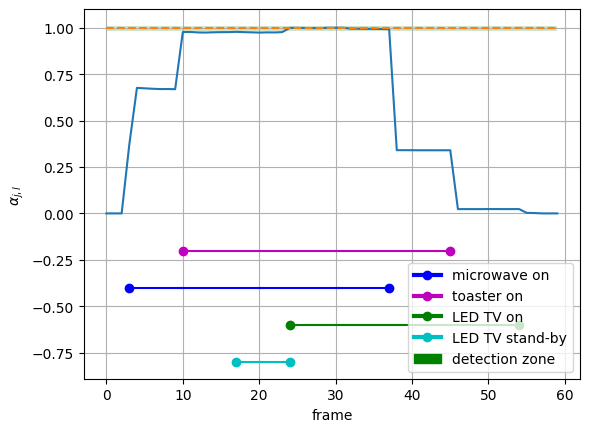

In [99]:
#tosta_micro_TV
dot_A_referencia_1_t_m_t_30mode=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[30][0:30], A)/(np.dot(H_A[30][0:30], H_A[30][0:30]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_t_m_t_30mode.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_t_m_t_30mode))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="green", alpha=0.2)


plt.savefig('tosta_micro_tv_ds4_nw', bbox_inches="tight")



plt.show()

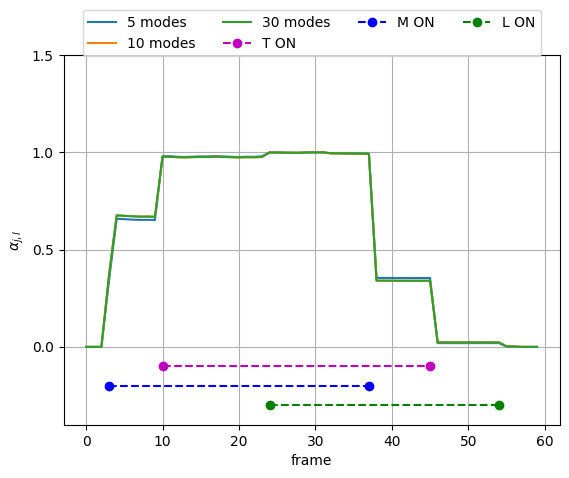

In [100]:
#plt.figure(figsize=(16,12))

plt.plot(np.abs(dot_A_referencia_1_t_m_t_1mode), label='5 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_10mode), label='10 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_30mode), label='30 modes')


#plt.plot([0,59],[1,1],'--',label='active level', linewidth=3)

plt.plot([10,45],[-0.1,-0.1],'o--m', label='T ON')

plt.plot([3,37],[-0.2,-0.2],'o--b', label='M ON')

plt.plot([24,54],[-0.3,-0.3],'o--g', label='L ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

#plt.legend()

plt.grid()


plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))


plt.xticks([0, 10, 20, 30, 40, 50, 60])


plt.yticks([0.00, 0.50, 1.00, 1.50])




plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.ylim(-0.4,1.5)

plt.savefig('micro_tosta_tv_1_10_30modes_v1')


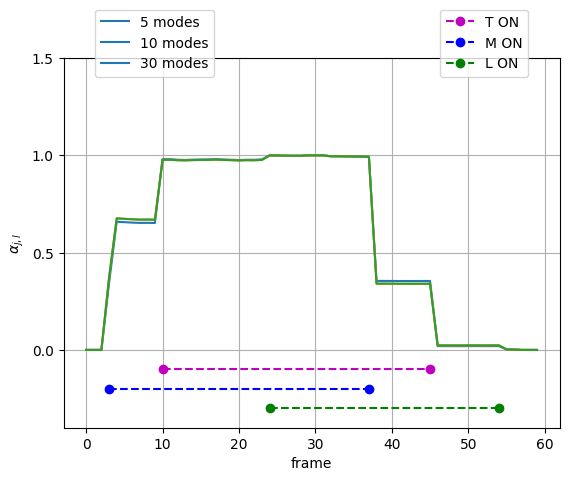

In [101]:
# Graficar las series principales
plt.plot(np.abs(dot_A_referencia_1_t_m_t_1mode), label='5 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_10mode), label='10 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_30mode), label='30 modes')

# Graficar eventos específicos
plt.plot([10, 45], [-0.1, -0.1], 'o--m', label='T ON')
plt.plot([3, 37], [-0.2, -0.2], 'o--b', label='M ON')
plt.plot([24, 54], [-0.3, -0.3], 'o--g', label='L ON')

# Configuración del gráfico
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50])

plt.ylim(-0.4, 1.5)
plt.grid()

# Crear la primera leyenda para los modos
legend1 = plt.legend(handles=[plt.Line2D([], [], label='5 modes'),
                              plt.Line2D([], [], label='10 modes'),
                              plt.Line2D([], [], label='30 modes')],
                     loc='upper left', bbox_to_anchor=(0.05, 1.15), ncol=1)

# Añadir la primera leyenda al gráfico
plt.gca().add_artist(legend1)

# Crear la segunda leyenda para los eventos
plt.legend(handles=[plt.Line2D([], [], label='T ON', linestyle='--', marker='o', color='m'),
                    plt.Line2D([], [], label='M ON', linestyle='--', marker='o', color='b'),
                    plt.Line2D([], [], label='L ON', linestyle='--', marker='o', color='g')],
           loc='upper right', bbox_to_anchor=(0.95, 1.15), ncol=1)

plt.savefig('micro_tosta_tv_1_10_30modes_v1')
# Mostrar el gráfico
plt.show()


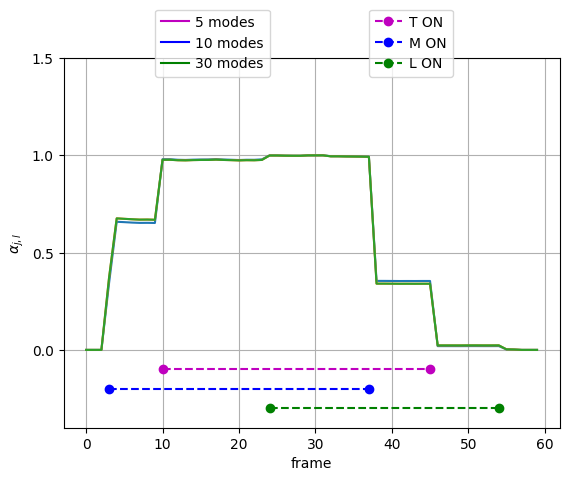

In [102]:
# Graficar las series principales
plt.plot(np.abs(dot_A_referencia_1_t_m_t_1mode), label='5 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_10mode), label='10 modes')
plt.plot(np.abs(dot_A_referencia_1_t_m_t_30mode), label='30 modes')

# Graficar eventos específicos
plt.plot([10, 45], [-0.1, -0.1], 'o--m', label='T ON')
plt.plot([3, 37], [-0.2, -0.2], 'o--b', label='M ON')
plt.plot([24, 54], [-0.3, -0.3], 'o--g', label='L ON')

# Configuración del gráfico
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

plt.xticks([0, 10, 20, 30, 40, 50, 60])
plt.yticks([0.00, 0.50, 1.00, 1.50])

plt.ylim(-0.4, 1.5)
plt.grid()

# Crear la primera leyenda para los modos
legend1 = plt.legend(handles=[plt.Line2D([], [], label='5 modes', color='m'),
                              plt.Line2D([], [], label='10 modes', color='b'),
                              plt.Line2D([], [], label='30 modes', color='g')],
                     loc='upper center', bbox_to_anchor=(0.3, 1.15), ncol=1,
                     columnspacing=0.5, handletextpad=0.5)

# Añadir la primera leyenda al gráfico
plt.gca().add_artist(legend1)

# Crear la segunda leyenda para los eventos
plt.legend(handles=[plt.Line2D([], [], label='T ON', linestyle='--', marker='o', color='m'),
                    plt.Line2D([], [], label='M ON', linestyle='--', marker='o', color='b'),
                    plt.Line2D([], [], label='L ON', linestyle='--', marker='o', color='g')],
           loc='upper center', bbox_to_anchor=(0.7, 1.15), ncol=1,
           columnspacing=0.5, handletextpad=0.5)

# Mostrar el gráfico

plt.savefig('micro_tosta_tv_1_10_30modes_v1')
plt.show()


In [103]:
nominal_micro=H_B[10][0:1] #arranco en uno para prescindir del armónico fundamental.
nominal_tosta=H_C[30][0:1]
nominal_TV=H_D[40][0:1]

np_list1 = np.array(nominal_micro)# heladera nominal
np_list2 = np.array(nominal_tosta)# tostadora nominal

micro_tosta= np_list1 + np_list2
micro_tosta=list(micro_tosta)

np_list3=np.array(nominal_TV)
micro_tosta_tv=micro_tosta+np_list3

tosta_tv=np_list2+np_list3


micro_tv=np_list1+np_list3



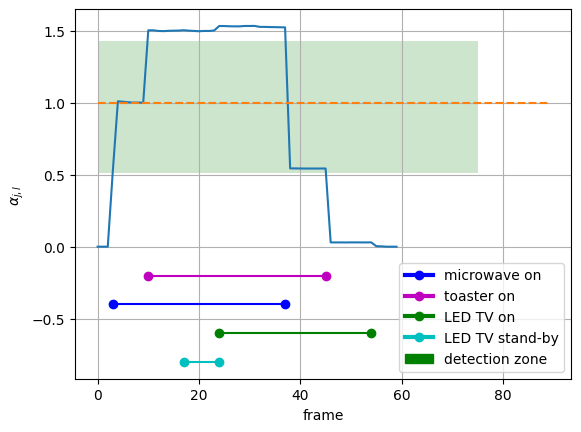

In [104]:

#micro_solo
dot_A_referencia_micro_solo_direct=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_micro, A)/(np.dot(nominal_micro, nominal_micro))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_solo_direct.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_solo_direct))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

#plt.plot([54,56],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.plot([0,89],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 75], [1, 1], [1.43, 1.43], facecolor="green", alpha=0.2)

plt.fill_between([0, 75], [1, 1], [0.51, 0.51], facecolor="green", alpha=0.2)


legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]


plt.legend(handles=legend_elements, loc='best')

#plt.axvline(55, color = "red", linewidth = 1, linestyle = "dashed")

plt.savefig('micro_solo_ds4_nw', bbox_inches="tight")

plt.show()


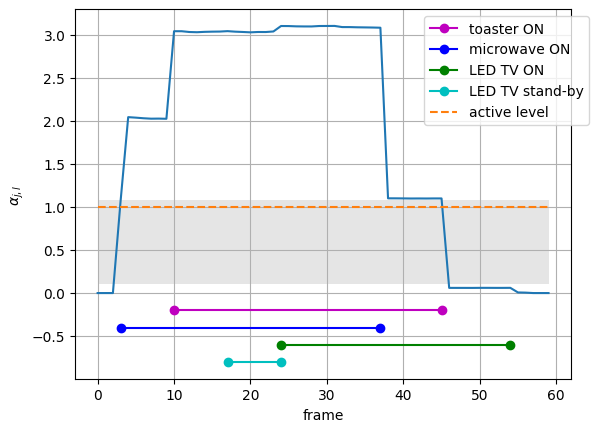

In [105]:
#tosta_sola
dot_A_referencia_tosta_sola_direct=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_tosta, A)/(np.dot(nominal_tosta, nominal_tosta))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_sola_direct.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_sola_direct))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')



plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



#plt.fill_between([0, 75], [1, 1], [1.75, 1.75], facecolor="green", alpha=0.2)

#plt.fill_between([0, 75], [1, 1], [0.50, 0.50], facecolor="green", alpha=0.2)


plt.plot([0,59],[1,1],'--',label='active level')



#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.08, 1.08], facecolor="grey", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.1, 0.1], facecolor="grey", alpha=0.2)


plt.savefig('tosta_sola_ds4_nw', bbox_inches="tight")

plt.show()


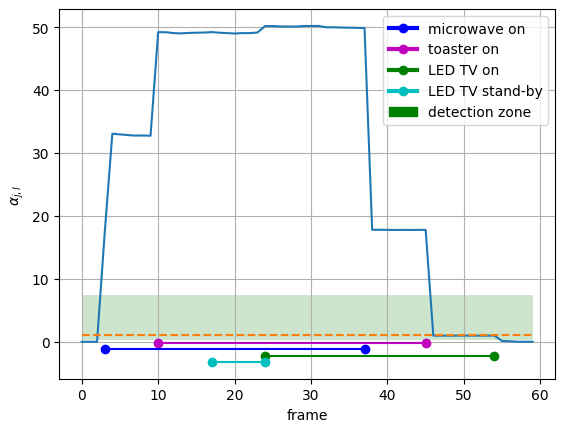

In [106]:
#tv_sola
dot_A_referencia_1_direct_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_TV, A)/(np.dot(nominal_TV, nominal_TV))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_direct_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_direct_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')




plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-1.2,-1.2],'o-b', label='microwave ON')

plt.plot([24,54],[-2.2,-2.2],'o-g', label='LED TV ON')

plt.plot([17,24],[-3.2,-3.2],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')




plt.fill_between([0, 59], [1, 1], [7.5, 7.5], facecolor="g", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.3, 0.3], facecolor="g", alpha=0.2)

plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.savefig('tv_sola_ds4_nw', bbox_inches="tight")

plt.show()


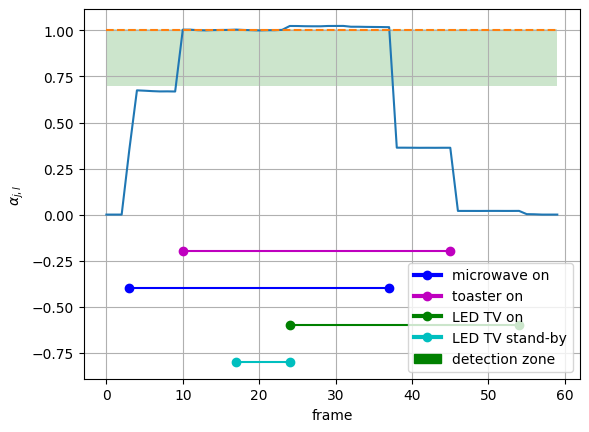

In [107]:
#tosta_micro
dot_A_referencia_tosta_micro=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[20][0:1], A)/(np.dot(H_A[20][0:1], H_A[20][0:1]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_micro.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_micro))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')



plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')




plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.7, 0.7], facecolor="green", alpha=0.2)

plt.savefig('tosta_micro_ds4_nw', bbox_inches="tight")

#plt.axvline(23, color = "red", linewidth = 1, linestyle = "dashed")

plt.show()


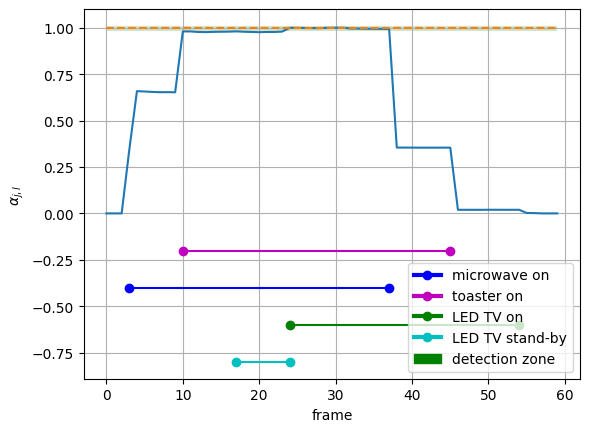

In [108]:

#tosta_micro_TV
dot_A_referencia_1_t_m_t=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[30][0:1], A)/(np.dot(H_A[30][0:1], H_A[30][0:1]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_1_t_m_t.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1_t_m_t))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)


plt.fill_between([0, 59], [1, 1], [1.01, 1.01], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="green", alpha=0.2)


plt.savefig('tosta_micro_tv_ds4_nw', bbox_inches="tight")



plt.show()


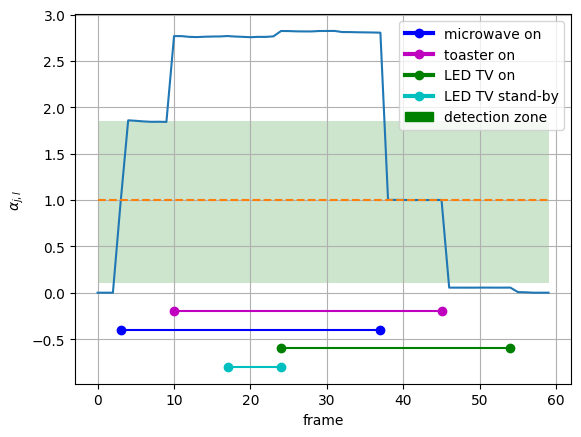

In [109]:
#tosta_tv
dot_A_referencia_tosta_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[42][0:1], A)/(np.dot(H_A[42][0:1], H_A[42][0:1]))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_tosta_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')


plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Line2D([0], [0], marker='o',color='c',lw=3, label='LED TV stand-by'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [1.85, 1.85], facecolor="green", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

plt.savefig('tosta_tv_ds4_nw', bbox_inches="tight")

plt.show()



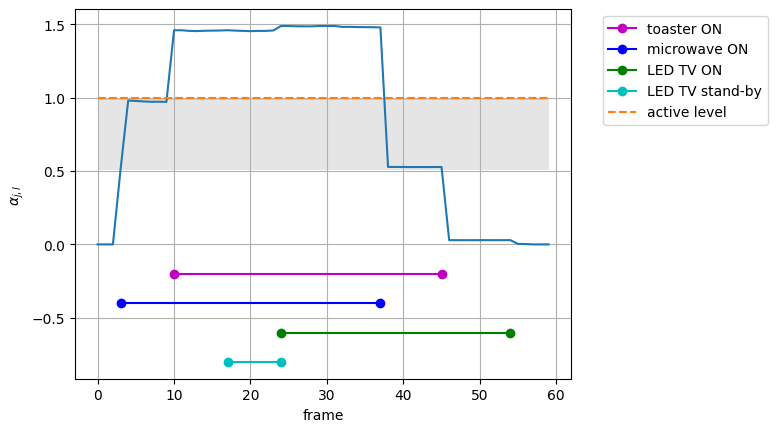

In [110]:
#micro_TV
dot_A_referencia_micro_tv=[]
i=0
while i<len(windows_agregado_2023):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:1]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(micro_tv, A)/(np.dot(micro_tv, micro_tv))                          #para comparar con la ortonormalización.

  #x=np.dot(H_AAA[20][0:10], A)/(np.dot(A, A))

  dot_A_referencia_micro_tv.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_tv))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')


#plt.plot([56,59],[0.9,0.9],'o-m', label='microwave+toaster+fridge')

#plt.plot([82,89],[1.5,1.5],'o-m', label='only fridge ON')

plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

legend_elements = [Line2D([0], [0], marker='o',color='b', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='m', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='g',lw=3, label='LED TV on'),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.plot([0,59],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
#plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(loc='upper left')

#plt.ylim(0,1.7)

plt.fill_between([0, 59], [1, 1], [0.98, 0.98], facecolor="grey", alpha=0.2)

plt.fill_between([0, 59], [1, 1], [0.51, 0.51], facecolor="grey", alpha=0.2)

plt.savefig('micro_tv_ds4_nw', bbox_inches="tight")

#plt.plot(RMS)


plt.show()


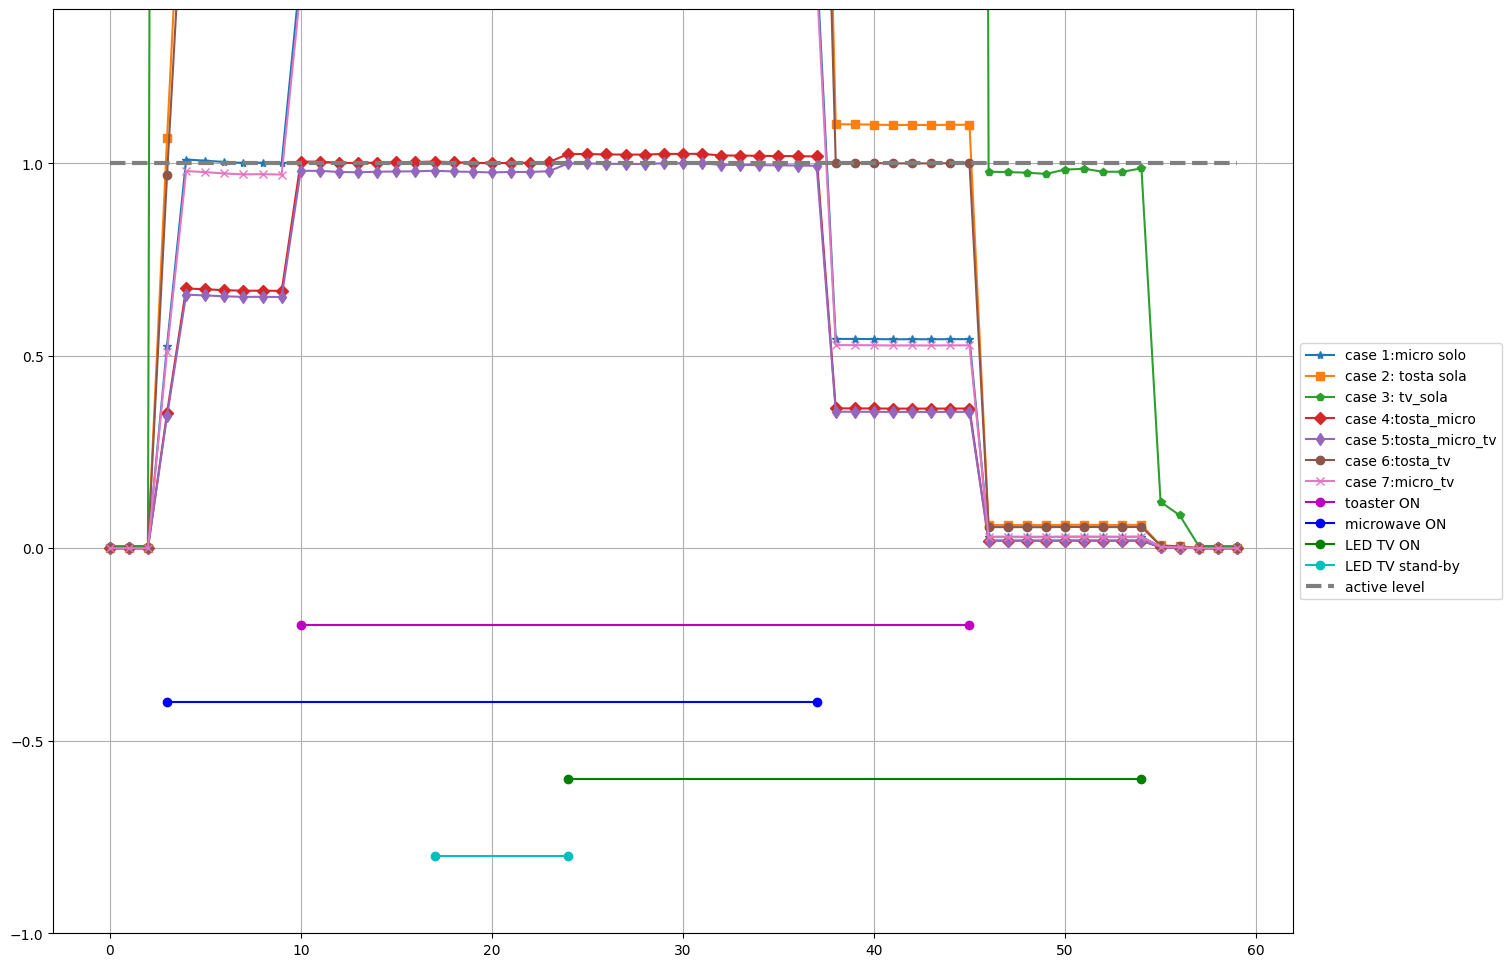

In [111]:
plt.figure(figsize=(16,12))

plt.plot(np.abs(dot_A_referencia_micro_solo_direct), label='case 1:micro solo', marker='*')

plt.plot(np.abs(dot_A_referencia_tosta_sola_direct), label='case 2: tosta sola', marker='s')

plt.plot(np.abs(dot_A_referencia_1_direct_tv), label='case 3: tv_sola', marker='p')

plt.plot(np.abs(dot_A_referencia_tosta_micro), label='case 4:tosta_micro',marker='D')

plt.plot(np.abs(dot_A_referencia_1_t_m_t), label='case 5:tosta_micro_tv', marker='d')

plt.plot(np.abs(dot_A_referencia_tosta_tv), label='case 6:tosta_tv', marker='o')

plt.plot(np.abs(dot_A_referencia_micro_tv), label='case 7:micro_tv', marker='x')

plt.ylim(-1,1.4)

plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')

plt.plot([0,59],[1,1],'--',label='active level', linewidth=3)

plt.grid()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.plot(np.abs(dot_A_referencia_11))
#plt.plot(np.abs(dot_A_referencia_1))
#plt.plot(np.abs(dot_A_referencia_111))

plt.savefig('comparación_todos_1modes', bbox_inches="tight")
plt.show()

In [112]:
caso1_10arm=dot_A_referencia_micro_solo_direct
caso2_10arm=dot_A_referencia_tosta_sola_direct
caso3_10arm=dot_A_referencia_1_direct_tv
caso4_10arm=dot_A_referencia_tosta_micro
caso5_10arm=dot_A_referencia_1_t_m_t
caso6_10arm=dot_A_referencia_tosta_tv
caso7_10arm=dot_A_referencia_micro_tv


todos_casos_10arm=[caso1_10arm,caso2_10arm,caso3_10arm, caso4_10arm, caso5_10arm, caso6_10arm, caso7_10arm]



df_todos_casos_10arm_DS4=pd.DataFrame(todos_casos_10arm)
df_todos_casos_10arm_DS4


df_todos_casos_10arm_DS4.to_csv('DF_todos_casos_10arm_DS4.csv')